In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from scipy import stats
from scipy.stats import norm


In [ ]:
ticker = "PSEC"
start_date = "2020-01-01"
end_date = "2023-01-01"
stock_data = yf.download(ticker, start=start_date, end=end_date)

ticker = "^GSPC"
start_date = "2020-01-01"
end_date = "2023-01-01"
market = yf.download(ticker, start=start_date, end=end_date)



In [33]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,20D_MA,50D_MA,20D_Volatility
Date,,,,,,,,,,
2020-03-13,4.96,5.09,4.72,5.00,3.543159,8220800,0.075269,4.078456,4.365197,0.040795
2020-03-16,4.46,5.00,4.40,4.71,3.337656,10058500,-0.058000,4.016582,4.341840,0.042019
2020-03-17,4.78,5.09,4.78,4.90,3.472294,12207500,0.040339,3.960739,4.321175,0.043648
2020-03-18,4.55,4.90,4.06,4.64,3.288051,13339300,-0.053061,3.895332,4.296964,0.044397
2020-03-19,4.62,5.01,4.43,5.01,3.550245,7824400,0.079741,3.843386,4.277997,0.049216


In [34]:
market.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,20D_MA,50D_MA,20D_Volatility
Date,,,,,,,,,,
2020-08-03,3288.260010,3302.729980,3284.530029,3294.610107,3294.610107,4438940000,0.007181,3221.832007,3144.443213,0.008259
2020-08-04,3289.919922,3306.840088,3286.370117,3306.510010,3306.510010,4414380000,0.003612,3229.891504,3151.464414,0.007710
2020-08-05,3317.370117,3330.770020,3317.370117,3327.770020,3327.770020,4535060000,0.006430,3237.783008,3158.184414,0.007666
2020-08-06,3323.169922,3351.030029,3318.139893,3349.159912,3349.159912,4278930000,0.006428,3247.638501,3164.445015,0.007467
2020-08-07,3340.050049,3352.540039,3328.719971,3351.280029,3351.280029,4110030000,0.000633,3255.950500,3170.876016,0.007275


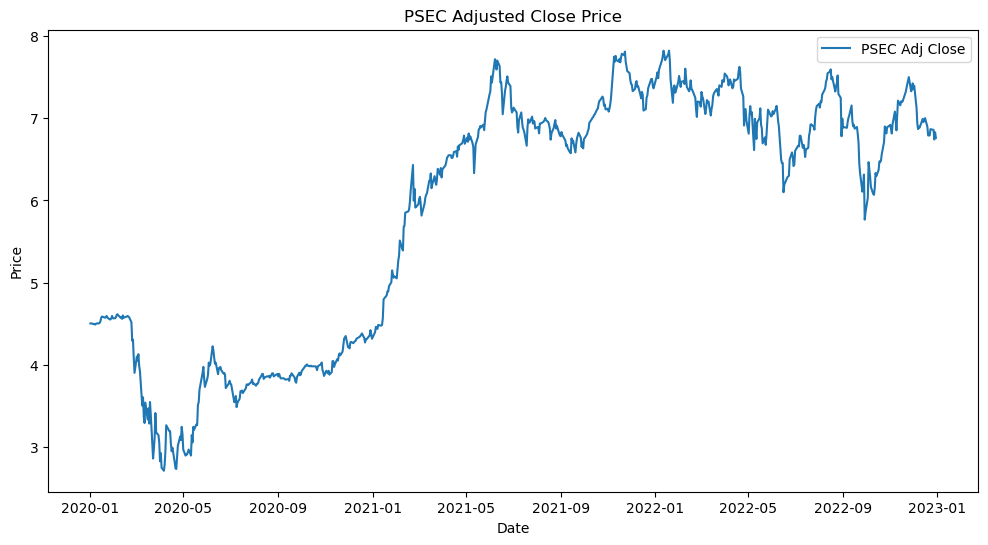

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Adj Close'], label='PSEC Adj Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PSEC Adjusted Close Price')
plt.legend()
plt.show()

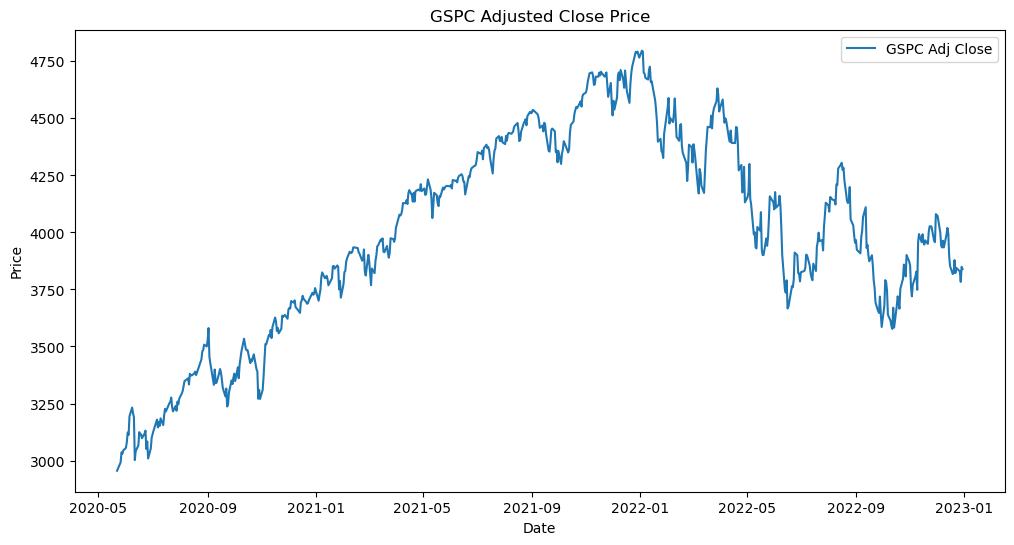

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(market['Adj Close'], label='GSPC Adj Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GSPC Adjusted Close Price')
plt.legend()
plt.show()

In [30]:
# Daily returns
stock_data['Daily_Returns'] = stock_data['Adj Close'].pct_change()
market['Daily_Returns'] = market['Adj Close'].pct_change()

# Moving averages
stock_data['20D_MA'] = stock_data['Adj Close'].rolling(window=20).mean()
stock_data['50D_MA'] = stock_data['Adj Close'].rolling(window=50).mean()
market['20D_MA'] = market['Adj Close'].rolling(window=20).mean()
market['50D_MA'] = market['Adj Close'].rolling(window=50).mean()

# Volatility (20-day)
stock_data['20D_Volatility'] = stock_data['Daily_Returns'].rolling(window=20).std()
market['20D_Volatility'] = market['Daily_Returns'].rolling(window=20).std()

#Annualized Volatility (252-day)
psec_annual_vol = (stock_data['Daily_Returns'].std() * np.sqrt(252)) * 100
market_annual_vol = (market['Daily_Returns'].std() * np.sqrt(252)) * 100



# Drop missing values (from moving average calculation)
stock_data.dropna(inplace=True)
market.dropna(inplace=True)

print(f'The GSPC annual volatility is {market_annual_vol: .2f}%')
print(f'The PSEC annual volatility is {psec_annual_vol: .2f}%')


The GSPC annual volatility is  19.30%
The PSEC annual volatility is  33.45%


In [31]:
psec_var_95 = norm.ppf(1 - 0.95, stock_data['Daily_Returns'].mean(), stock_data['Daily_Returns'].std()) * 100
market_var_95 = norm.ppf(1 - 0.95, market['Daily_Returns'].mean(), market['Daily_Returns'].std()) * 100

print(f'PSEC VaR is {psec_var_95:.2f}%')
print(f"GSPC VaR is {market_var_95:.2f}%")

PSEC VaR is -3.29%
GSPC VaR is -1.94%


In [32]:
marketreturns = market['Daily_Returns']

market_cvar_95 = marketreturns[marketreturns <= market_var_95].mean()
cvar_percent = market_cvar_95 * 100

dailyreturns = stock_data['Daily_Returns']

psec_cvar_95 = dailyreturns[dailyreturns <= psec_var_95].mean()
psec_cvar_percent = psec_cvar_95 * 100

#print(f'The CVaR for PSEC is {psec_cvar_95}%')
#print(f'The CVaR for GSPC is {cvar_percent}%')

print(cvar_percent)

nan
